                        open     high      low    close       volume
timestamp                                                           
2024-05-04 14:00:00  0.02594  0.02598  0.02580  0.02589    3308960.1
2024-05-04 15:00:00  0.02591  0.02596  0.02571  0.02593    4550507.1
2024-05-04 16:00:00  0.02594  0.02596  0.02574  0.02589    5133420.4
2024-05-04 17:00:00  0.02589  0.02594  0.02568  0.02583    7215811.1
2024-05-04 18:00:00  0.02582  0.02616  0.02579  0.02612    5431474.1
...                      ...      ...      ...      ...          ...
2024-05-25 05:00:00  0.08038  0.08392  0.07935  0.08342  133022796.0
2024-05-25 06:00:00  0.08342  0.09436  0.08284  0.09228  307548054.6
2024-05-25 07:00:00  0.09232  0.09850  0.09223  0.09515  312326927.7
2024-05-25 08:00:00  0.09515  0.09600  0.09330  0.09526  139564361.1
2024-05-25 09:00:00  0.09527  0.09691  0.09027  0.09085  298160935.6

[500 rows x 5 columns]


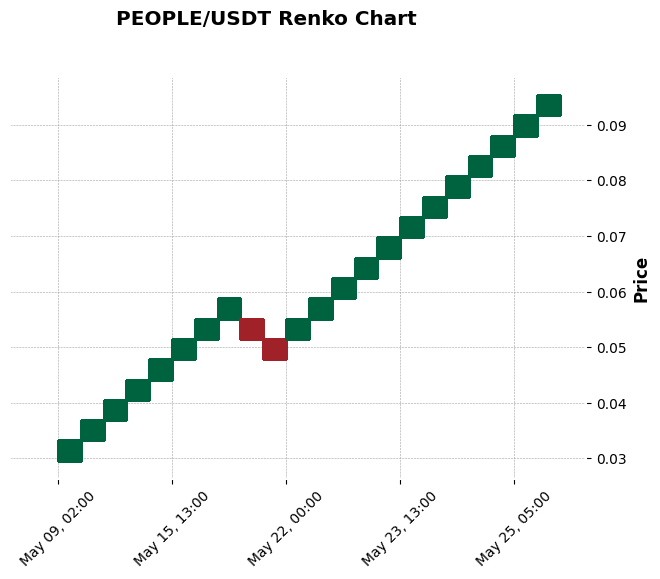

In [11]:
import ccxt
import datetime
import pandas as pd
import mplfinance as mpf

# Initialize the exchange
exchange = ccxt.binance()  # You can change this to the exchange you prefer
exchange2 = ccxt.okx()

# Define the symbol and timeframe
symbol = 'PEOPLE/USDT'
timeframe = '1h'

# Calculate the since timestamp (30 days ago)
since = exchange.parse8601((datetime.datetime.utcnow() - datetime.timedelta(days=30)).isoformat())

# Fetch the historical data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)

# Create a DataFrame from the fetched data
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert the timestamp to a readable datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Print the DataFrame
print(df)

# Create the Renko chart
mpf.plot(df, type='renko', style='charles', title='PEOPLE/USDT Renko Chart', ylabel='Price')

# Optionally, save the plot to a file
mpf.plot(df, type='renko', style='charles', title='PEOPLE/USDT Renko Chart', ylabel='Price', savefig='renko_chart.png')


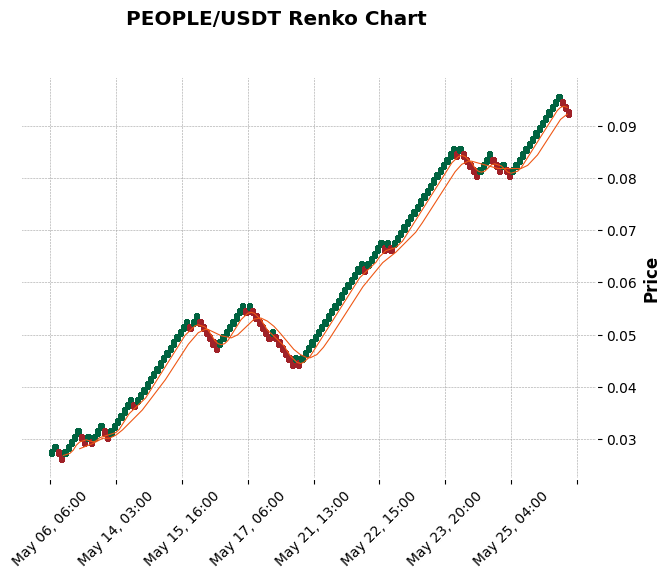

In [14]:
mpf.plot(df, type='renko', style='charles', title='PEOPLE/USDT Renko Chart', ylabel='Price', renko_params=dict(brick_size=0.001), mav=(5,10,))

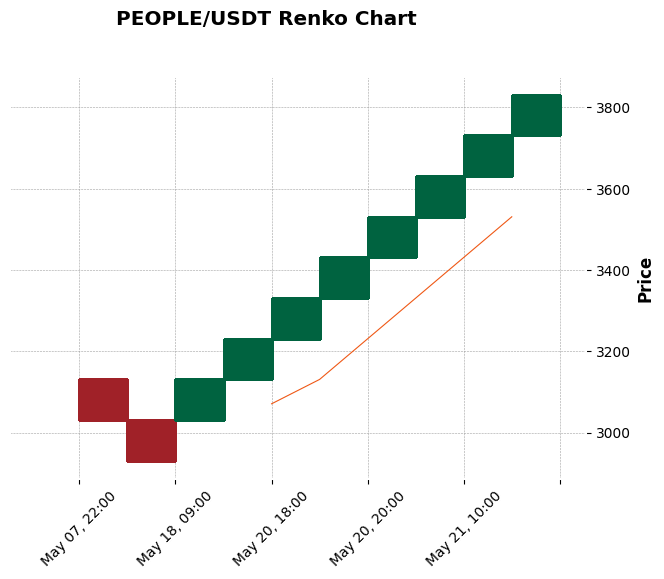

In [17]:
# Define the symbol and timeframe
symbol = 'ETH/USDT'
timeframe = '1h'

# Calculate the since timestamp (30 days ago)
since = exchange.parse8601((datetime.datetime.utcnow() - datetime.timedelta(days=30)).isoformat())

# Fetch the historical data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)

# Create a DataFrame from the fetched data
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert the timestamp to a readable datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)
mpf.plot(df, type='renko', style='charles', title='ETH/USDT Renko Chart', ylabel='Price', renko_params=dict(brick_size=100), mav=(5,10,))